##  THE SPARKS FOUNDATION - GRIP - Data Science and Business Analytics
### Task 02 : Prediction Using Unsupervised Machine Learning
#### Author : Prachi Prajapat
### Dataset Used : iris dataset available in sklearn library

## Problem Statement

   Predict the optimum number of clusters and represent it visually

### Import required libraries


In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns

### Read the iris dataset


In [2]:
iris = pd.read_csv("Iris.csv")
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
iris.shape

(150, 6)

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
iris.drop("Id" , axis=1,inplace=True)
iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### Check is there any null and Duplicates in the given Dataset

In [6]:
print(iris.isnull().sum() ,"\n\nNumber of duplicate rows: ",iris.duplicated().sum() )

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64 

Number of duplicate rows:  3


### Drop duplicate Rows


In [7]:
iris.drop_duplicates(inplace=True)
iris.shape[0]

147

## Check for the outliers in the numeric data 

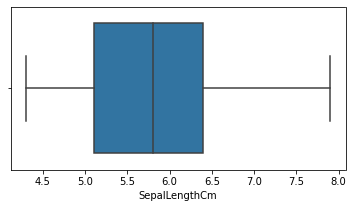

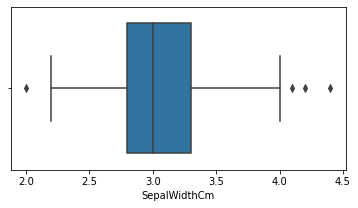

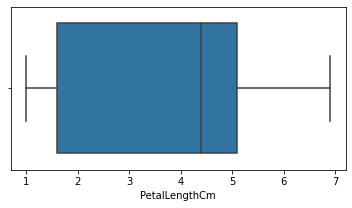

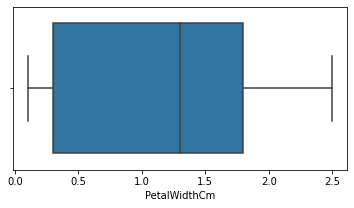

In [8]:
for i in iris.columns:
    if iris[i].dtype=='float64':
        plt.figure(figsize=(6,3))
        sns.boxplot(iris[i])
        plt.show()

## Treating outliers present in the SepalWidthCm column

In [9]:
q1,q3=np.percentile(iris['SepalWidthCm'],[25,75])
iqr=q3-q1
lower = q1 - (1.5*iqr)
upper = q1 + (1.5*iqr)
iris['SepalWidthCm']=iris['SepalWidthCm'].apply(lambda x: upper if x>upper
                                               else lower if x<lower else x)

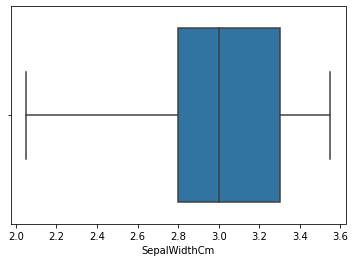

In [10]:
sns.boxplot(iris['SepalWidthCm']);

## Understanding the data

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64


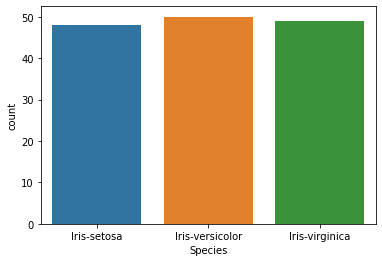

In [11]:
print(iris.Species.value_counts())
sns.countplot(iris.Species);

In [12]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.020068,3.780272,1.208844
std,0.829100,0.370193,1.759111,0.757874
min,4.300000,2.050000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,3.550000,6.900000,2.500000


In [13]:
iris.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Correlation Matrix

In [15]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.107485,0.871305,0.817058
SepalWidthCm,-0.107485,1.000000,-0.398486,-0.325818
PetalLengthCm,0.871305,-0.398486,1.000000,0.961883
PetalWidthCm,0.817058,-0.325818,0.961883,1.000000


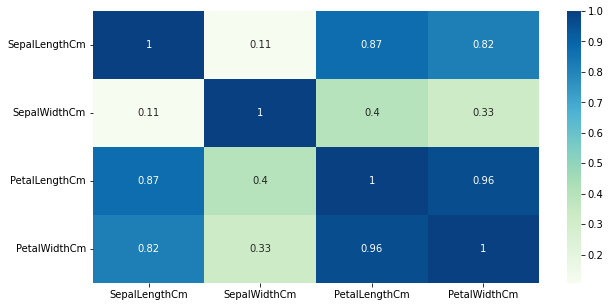

In [16]:
plt.figure(figsize=(10,5))
sns.heatmap(abs(iris.corr()),cmap='GnBu',annot=True);

### Finding the optimum number of clusters for k-means classification

In [17]:
from sklearn.cluster import KMeans

In [18]:
x = iris.iloc[:, [0, 1, 2, 3]].values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

### Plotting the results onto a line graph, 
### allowing us to observe 'The elbow

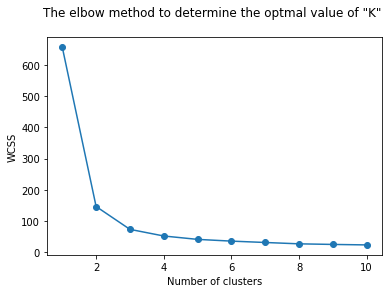

In [19]:
plt.plot(range(1, 11), wcss,marker='o')
plt.title('The elbow method to determine the optmal value of "K" \n')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

### Applying kmeans to the dataset / Creating the kmeans classifier

In [20]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [21]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0])

In [22]:
iris['cluster']=y_kmeans
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,5.1,3.50,1.4,0.2,Iris-setosa,1
1,4.9,3.00,1.4,0.2,Iris-setosa,1
2,4.7,3.20,1.3,0.2,Iris-setosa,1
3,4.6,3.10,1.5,0.2,Iris-setosa,1
4,5.0,3.55,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.00,5.2,2.3,Iris-virginica,2
146,6.3,2.50,5.0,1.9,Iris-virginica,0
147,6.5,3.00,5.2,2.0,Iris-virginica,2
148,6.2,3.40,5.4,2.3,Iris-virginica,2


### Visualising the clusters - On the first two columns

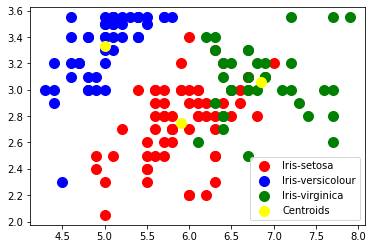

In [23]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
